In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load the Titanic dataset
titanic = sns.load_dataset("titanic")



In [3]:
# Display first few rows to understand the structure
print(titanic.head())



   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [4]:
# Drop NA values from 'age' for clean plotting
age = titanic['age'].dropna()

# Calculate IQR for 'age'
Q1 = age.quantile(0.25)
Q3 = age.quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Get outlier values
outliers = age[(age < lower_bound) | (age > upper_bound)]

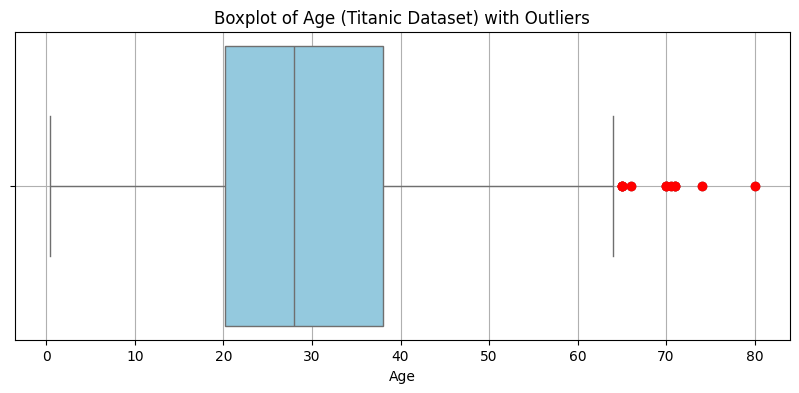

In [5]:
# Plot boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(x=age, color='skyblue')

# Plot outliers as red dots
for outlier in outliers:
    plt.plot(outlier, 0, 'ro')  # 'ro' = red circle

# Add labels
plt.title("Boxplot of Age (Titanic Dataset) with Outliers")
plt.xlabel("Age")
plt.grid(True)
plt.show()

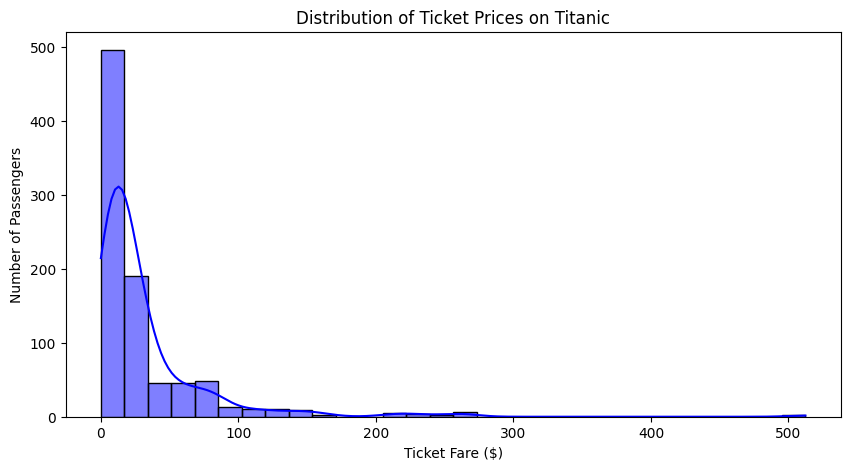

In [6]:
# Plot histogram for 'fare' distribution
plt.figure(figsize=(10, 5))
sns.histplot(titanic['fare'], bins=30, kde=True, color='blue')

# Set labels and title
plt.xlabel("Ticket Fare ($)")
plt.ylabel("Number of Passengers")
plt.title("Distribution of Ticket Prices on Titanic")

# Show the plot
plt.show()

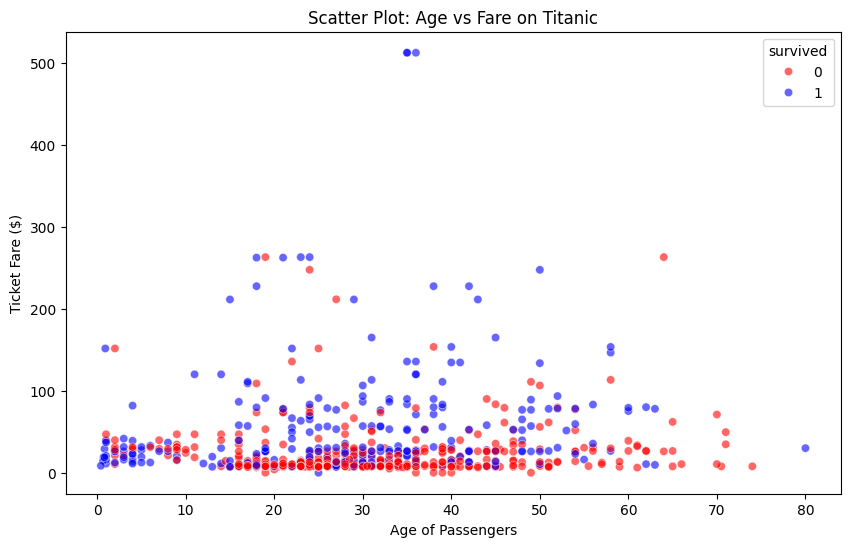

In [7]:
plt.figure(figsize=(10, 6))

# Scatter plot for 'age' vs 'fare'
sns.scatterplot(data=titanic, x='age', y='fare', hue='survived', palette={0: 'red', 1: 'blue'},  alpha=0.6)

# Set labels and title
plt.xlabel("Age of Passengers")
plt.ylabel("Ticket Fare ($)")
plt.title("Scatter Plot: Age vs Fare on Titanic")

# Show the plot
plt.show()